# Introducción a PyTorch


***

Esto simplemente es para que las gráficas se vean dentro del archivo.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1.- ¿Por donde empezamos?


Importando las librerias necesarias

In [2]:
from __future__ import print_function
import torch

El elemento principal será el concepto de **tensor** que lo podemos pensar como un arreglo multidimensional.

Construimos una matriz vacía 5x3

In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[1.1052e-22, 4.5691e-41, 1.1054e-22],
        [4.5691e-41, 1.1054e-22, 4.5691e-41],
        [1.1054e-22, 4.5691e-41, 1.1054e-22],
        [4.5691e-41, 1.1055e-22, 4.5691e-41],
        [1.1055e-22, 4.5691e-41, 1.1055e-22]])


Construimos una matriz aleatorioa 5x3


In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.5479, 0.1455, 0.3239],
        [0.3293, 0.7970, 0.9319],
        [0.0286, 0.5693, 0.4513],
        [0.5970, 0.6784, 0.3805],
        [0.1543, 0.8131, 0.9066]])


Construimos una matriz llena de ceros con elementos tipo entero de 64 bits



In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construir un tensor a partir de información


In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


o crear un tensor basado en un tensor existente. Estos métodos
reutilizan las propiedades del tensor original, e.g. dtype, etc.
Se pueden cambiar si se requiere.


In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # Creamos un tensor de tamaño 5x3
print(x)

x = torch.randn_like(x, dtype=torch.float)    # sobreescribimos dtype!
print(x)                                      # tiene el mismo tamaño que el original.

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.2211,  1.2314,  0.8769],
        [-0.9111,  2.4090,  1.1181],
        [ 1.2196, -0.1602, -0.4388],
        [-0.8435, -1.7571, -0.5556],
        [ 1.2923, -0.8258, -0.2282]])


Para saber su tamaño (en general)



In [8]:
print(x.size())

torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` es un tupla, por lo tanto, soporta sus operaciones.</p></div>


### Operaciones


Los tensores típicamente soportan dos tipos de operaciones.

* In situ: Afecta al tensor sobre el cual son llamadas. **Siempre tienen un _ al final de su nombre**
* No in situ: Producen un nuevo tensor.

Hay varias formas de la escritura de operaciones.

Por ejemplo, 

#### Suma

* Escritura 1

In [9]:
y = torch.rand(5, 3)
print(y)
print(x + y) # NUEVO TENSOR

tensor([[0.2317, 0.0146, 0.0276],
        [0.7978, 0.9900, 0.7490],
        [0.3693, 0.8042, 0.8348],
        [0.6745, 0.8421, 0.0530],
        [0.0783, 0.1410, 0.6724]])
tensor([[ 0.4528,  1.2461,  0.9045],
        [-0.1133,  3.3991,  1.8671],
        [ 1.5889,  0.6440,  0.3960],
        [-0.1690, -0.9150, -0.5026],
        [ 1.3706, -0.6848,  0.4443]])


* Escritura 2


In [10]:
print(torch.add(x, y)) # NUEVO TENSOR SIN MODIFICAR A X Y Y
print(y)

tensor([[ 0.4528,  1.2461,  0.9045],
        [-0.1133,  3.3991,  1.8671],
        [ 1.5889,  0.6440,  0.3960],
        [-0.1690, -0.9150, -0.5026],
        [ 1.3706, -0.6848,  0.4443]])
tensor([[0.2317, 0.0146, 0.0276],
        [0.7978, 0.9900, 0.7490],
        [0.3693, 0.8042, 0.8348],
        [0.6745, 0.8421, 0.0530],
        [0.0783, 0.1410, 0.6724]])


La suma tiene como argumento el tensor de salida.


In [11]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.4528,  1.2461,  0.9045],
        [-0.1133,  3.3991,  1.8671],
        [ 1.5889,  0.6440,  0.3960],
        [-0.1690, -0.9150, -0.5026],
        [ 1.3706, -0.6848,  0.4443]])


Recordemos en Python "Todo son clases y métodos."

*Escritura 3

In [12]:
y.add_(x)
print(y)

tensor([[ 0.4528,  1.2461,  0.9045],
        [-0.1133,  3.3991,  1.8671],
        [ 1.5889,  0.6440,  0.3960],
        [-0.1690, -0.9150, -0.5026],
        [ 1.3706, -0.6848,  0.4443]])


<div class="alert alert-info"><h4>Note</h4><p>Este tipo de operaciones cambian ''y''.
    Por ejemplo: ``y.copy_(x)``, ``y.t_()`.</p></div>

Podemos usar el sistema de indexación estándar como en Numpy (iniciamos con 0, como la gente decente).


In [13]:
print(x)

tensor([[ 0.2211,  1.2314,  0.8769],
        [-0.9111,  2.4090,  1.1181],
        [ 1.2196, -0.1602, -0.4388],
        [-0.8435, -1.7571, -0.5556],
        [ 1.2923, -0.8258, -0.2282]])


In [14]:
print(x[:, 1])

tensor([ 1.2314,  2.4090, -0.1602, -1.7571, -0.8258])


Podemos cambiar el tamaño y forma del tensor con ``torch.view``. Debemos pensarlo como vistas del tensor y así no hacemos copias del tensor que ocuparían memoria.


In [15]:
x = torch.randn(4, 4) # Tensor con una distribución normal, en lugar de una uniforme con rand
print(x,"\n")
y = x.view(16) # Vemos al tensor como un tensor (1,16)
print(y,"\n")
z = x.view(-1, 8)  # El valor de -1 se deducirá de las otras dimensiones
print(z,"\n")
r = x.view(-1,4)
print(r,"\n")
w = x.view(2,2,4) # Se divide en "2" de dimensiones 2x4
print(w,"\n")
print(x.size(), y.size(), z.size(), r.size(), w.size())

tensor([[ 1.4112,  1.6727,  0.6424,  1.1461],
        [ 0.7753,  0.5804, -1.5559,  1.2973],
        [-1.0576,  1.7512, -0.0413, -0.8266],
        [ 0.7991, -0.2035,  0.4537, -0.2919]]) 

tensor([ 1.4112,  1.6727,  0.6424,  1.1461,  0.7753,  0.5804, -1.5559,  1.2973,
        -1.0576,  1.7512, -0.0413, -0.8266,  0.7991, -0.2035,  0.4537, -0.2919]) 

tensor([[ 1.4112,  1.6727,  0.6424,  1.1461,  0.7753,  0.5804, -1.5559,  1.2973],
        [-1.0576,  1.7512, -0.0413, -0.8266,  0.7991, -0.2035,  0.4537, -0.2919]]) 

tensor([[ 1.4112,  1.6727,  0.6424,  1.1461],
        [ 0.7753,  0.5804, -1.5559,  1.2973],
        [-1.0576,  1.7512, -0.0413, -0.8266],
        [ 0.7991, -0.2035,  0.4537, -0.2919]]) 

tensor([[[ 1.4112,  1.6727,  0.6424,  1.1461],
         [ 0.7753,  0.5804, -1.5559,  1.2973]],

        [[-1.0576,  1.7512, -0.0413, -0.8266],
         [ 0.7991, -0.2035,  0.4537, -0.2919]]]) 

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8]) torch.Size([4, 4]) torch.Size([2, 2, 4])


Si tenemos un tensor de un elemento, usando ``.item()`` para
obtener el valor como un número de Python.


In [16]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.7961])
-0.7961360216140747


**Lo que no se dijo:**

  100+ operaciones de tensores tales como: transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.
  `Aquí más info <https://pytorch.org/docs/torch>`
  
### Conexión con NumPy 


Podemos convertir entre tensores de PyTorch a un array de Numpy.

Los dos objetos compartirán la localización en la memoria.

**Conviertiendo tensores a arrays**

In [17]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [18]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


Veamos como se modifican los valores en el array


In [19]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


**Converting NumPy Array to Torch Tensor**

Veamos como cambiando el array cambia el tensor automáticamente.

In [20]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


***
## 2.- Ejemplo de Red Neuronal Artificial (RNA)

Usaremos el viejo conocido ejemplo [MNIST](https://en.wikipedia.org/wiki/MNIST_database), que contiene
imágenes de números manuscritos del 0-9

**Carga de la base de dato (dataset)**

In [21]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import utils

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

Para usar el dataset se debe transforma en un tensor de Pytorch, definimos la transfomración *transform* que usaremos en el proceso de carga.

Definimos un *DataLoader*, un objeto [generador de Python](https://wiki.python.org/moin/Generators) cuyo comentido es proporcionar las imágenes en grupos de *batch_size*.

Separamos al dataset en dos, un conjunto de entrenamiento y otro de prueba.

In [22]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5)),])

train_set = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

Creamos un iterador sobre el conjunto de entrenamiento y visualizamos un muestra

In [23]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

Ahora veamos como se ve una muestra

In [24]:
print(images[1].numpy().squeeze())

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -0.8745098  -0.6313726
  -1.         -1.         -1.         -1.         -1.         -1.
  -0.77254903  0.9843137   0.00392163 -0.8745098  -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -0.92156863 -0.78039217
  -1.         -1.         -1.         -1.         -1.         -1.
  -0.77254903  0.9764706   0.9764706   0.09019613 -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1

Veamos la imagen de muestra

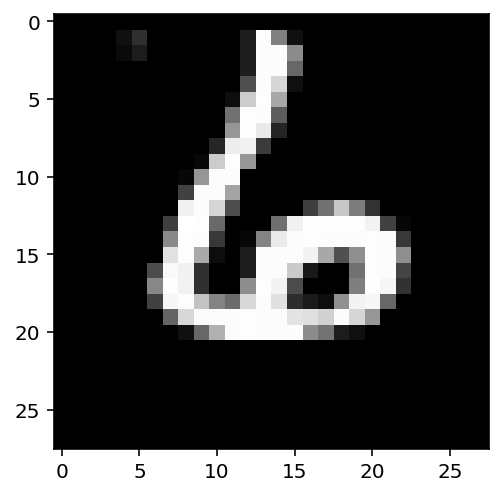

In [25]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray')

**Definición de la topología de la RNA**

Hay muchas formas de construir una red neuronal en Pytorch, pero ¿qué es una red neuronal artificial? *ver presentación*

Definimos como se compone la capa de entrada, las intermedias (u ocultas) y una de salida.

El número de capas ocultas, así como el número de neuronas en ellas, depende de la complejidad y el tipo de problema.

Usaremos 2 capas ocultas con 128 y 64 neuronas, respectivamente.

Importamos nn.Module 

In [26]:
class Network(nn.Module):        #Heredamos de la clase nn.Module los atributos para nuestra Network
    def __init__(self):          #Esto define al constructor de la clase
        super().__init__()
        self.fully_connected_1 = nn.Linear(784, 128)
        self.fully_connected_2 = nn.Linear(128, 64)
        self.fully_connected_3 = nn.Linear(64, 10)
        
    def forward(self, x):        #define el orden y las funciones de activación
        x = self.fully_connected_1(x)
        x = F.relu(x)
        x = self.fully_connected_2(x)
        x = F.relu(x)
        x = self.fully_connected_3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model

Network(
  (fully_connected_1): Linear(in_features=784, out_features=128, bias=True)
  (fully_connected_2): Linear(in_features=128, out_features=64, bias=True)
  (fully_connected_3): Linear(in_features=64, out_features=10, bias=True)
)

**La capa de entrada** 

Tiene tantas neuronas como datos contiene nuestra muestra. Es decir, las entradas son 28x28 píxeles mostrados los números manuscritos. Por lo tanto, nuestra capa de entrada consta de 28x28 neuronas.

**La capa de salida**

Tiene tantas posibles salidas como clases hay en nuestros datos, 10 en este caso los dígitos del 0 al 9.

**La función de activación**

Es la función de define la salida de un nodo en función de una entrada o conjunto de entradas. 
Usaremos [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) (Rectified Linear Unit) y
[Softmax](https://en.wikipedia.org/wiki/Softmax_function)


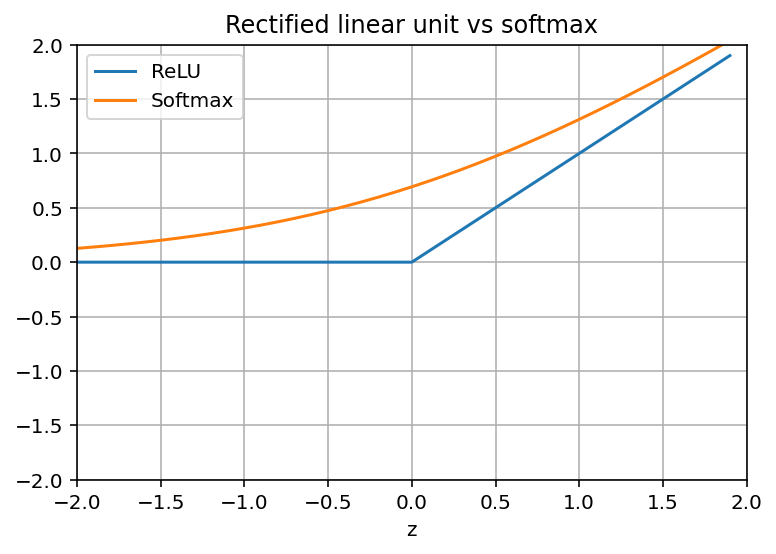

In [27]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-2, 2, .1)
zero = np.zeros(len(z))
y = np.max([zero, z], axis=0)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y,label="ReLU")
ax.plot(z,np.log(1+np.exp(z)),label="Softmax")
ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.legend()
ax.set_xlabel('z')
ax.set_title('Rectified linear unit vs softmax')

plt.show()

**Función de propagación "Forward"**

Define el orden en que se realizan los cálculos desde el input, a través de las hidden layers hasta el output, utilizando la función de activación.


En nuestro ejemplo, iniciamos con un tensor bidimensional 28x28 a uno unidimensional de 784 valores, que se le pasan a la capa de entrada, con la función *view*.

**Inicializando los pesos y *biases***

Ambos son iniciados automáticamente, pero podemos sobreescribirlos si queremos.

Éstos son tensores almacenados como miembros de cada capa.

In [28]:
print(model.fully_connected_1.weight)
print(model.fully_connected_1.bias)

Parameter containing:
tensor([[ 0.0300, -0.0149, -0.0027,  ...,  0.0259, -0.0206, -0.0059],
        [-0.0242, -0.0066, -0.0046,  ..., -0.0105,  0.0241,  0.0211],
        [ 0.0222, -0.0303, -0.0277,  ..., -0.0100,  0.0314,  0.0116],
        ...,
        [-0.0272,  0.0265, -0.0206,  ..., -0.0316,  0.0096, -0.0104],
        [-0.0214,  0.0150, -0.0298,  ..., -0.0193,  0.0011,  0.0125],
        [-0.0343,  0.0247,  0.0005,  ...,  0.0242, -0.0116, -0.0217]],
       requires_grad=True)
Parameter containing:
tensor([-0.0062,  0.0086,  0.0300,  0.0283, -0.0121, -0.0244, -0.0321, -0.0066,
        -0.0142,  0.0179, -0.0089,  0.0054,  0.0028, -0.0233,  0.0066,  0.0106,
        -0.0100,  0.0184,  0.0104,  0.0213,  0.0182,  0.0257, -0.0034,  0.0302,
         0.0039,  0.0293,  0.0150,  0.0105, -0.0315, -0.0068, -0.0007, -0.0271,
         0.0235,  0.0203, -0.0268, -0.0237, -0.0238, -0.0344,  0.0265, -0.0255,
        -0.0126,  0.0228, -0.0199, -0.0185, -0.0170, -0.0270, -0.0318,  0.0112,
         0.0328

Para modificar estos tensores podemos usar operaciones in situ.

In [29]:
# Set biases to all 0s
model.fully_connected_1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
# Sample from random normal
model.fully_connected_1.weight.data.normal_(std=0.01)

tensor([[-9.4966e-03,  1.6806e-02,  1.0970e-02,  ...,  1.0466e-03,
          2.4447e-03, -1.4205e-02],
        [-2.5345e-02, -5.0670e-03, -7.8064e-04,  ..., -5.2120e-03,
          1.0436e-02,  1.6731e-02],
        [-4.8494e-03,  8.2005e-03,  7.6993e-03,  ...,  2.3302e-03,
          2.6469e-04,  1.6690e-02],
        ...,
        [ 2.3217e-02,  1.0753e-02, -2.8620e-03,  ...,  3.2552e-03,
         -6.9135e-04,  7.7501e-03],
        [-5.5487e-03, -6.9565e-03,  2.8558e-02,  ...,  4.9546e-03,
         -5.1342e-03, -5.8133e-05],
        [ 2.7805e-03, -4.9246e-04, -1.1407e-02,  ...,  7.8534e-03,
          1.2269e-02, -5.1309e-03]])

**Seguimiento**

Pasemosle una imagen a la red, para eso debemos convertirla en tensor para luego aplicarle el método *Foward*

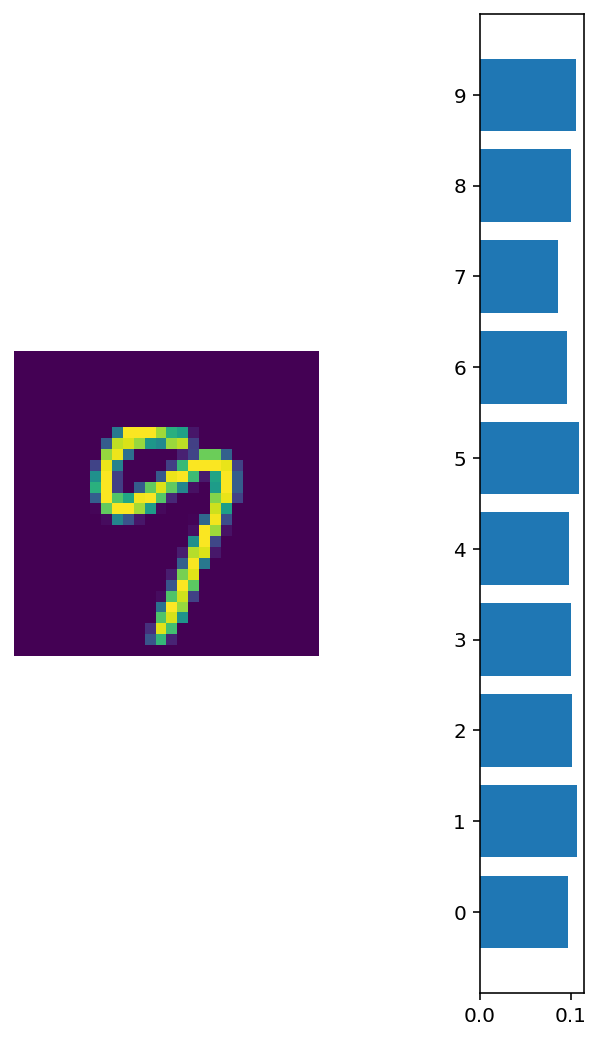

In [31]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

images.resize_(64, 1, 784)

image_index = 0
ps = model.forward(images[image_index, :])

image = images[image_index]
utils.view_classify(image.view(1, 28, 28), ps)

La red es bastante tonta, pero es normal falta entrenarla.

**Otra manera de construir redes**

También podemos definir una redes con un paradigma funcional. Básicamente, estamos definido la red
como una lista de capas u operaciones por las cuales el tensor de entrada deberá pasar en secuencia

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


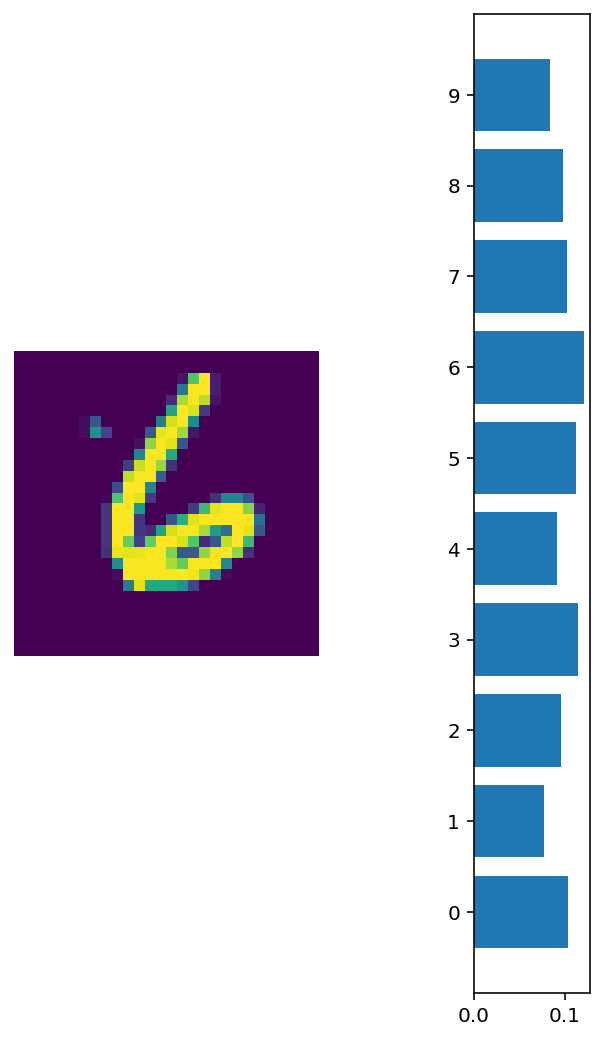

In [32]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
utils.view_classify(images[0].view(1, 28, 28), ps)

El problema de esta manera de crear una red neuronal es que terminamos con índices en vez de nombres asociados a cada operación. Podemos solucionar esto pasándole un `OrderedDict` será un par de la forma (_nombre de la operación_, _operación_)

In [33]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict(
            [('fully_connected_1', nn.Linear(input_size, hidden_sizes[0])),
             ('relu_1', nn.ReLU()),
             ('fully_connected_2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
             ('relu_2', nn.ReLU()),
             ('output', nn.Linear(hidden_sizes[1], output_size)),
             ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=128, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=128, out_features=64, bias=True)
  (relu_2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Por diversión, creemos una red más compleja.

In [34]:
input_size = 784
layer_sizes = [400, 200, 100]
output_size = 10

model = model = nn.Sequential(OrderedDict(
            [('fully_connected_1', nn.Linear(input_size, layer_sizes[0])),
             ('relu_1', nn.ReLU()),
             ('fully_connected_2', nn.Linear(layer_sizes[0], layer_sizes[1])),
             ('relu_2', nn.ReLU()),
             ('fully_connected_3', nn.Linear(layer_sizes[1], layer_sizes[2])),
             ('relu_3', nn.ReLU()),
             ('output', nn.Linear(layer_sizes[2], output_size)),
             ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=400, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=400, out_features=200, bias=True)
  (relu_2): ReLU()
  (fully_connected_3): Linear(in_features=200, out_features=100, bias=True)
  (relu_3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

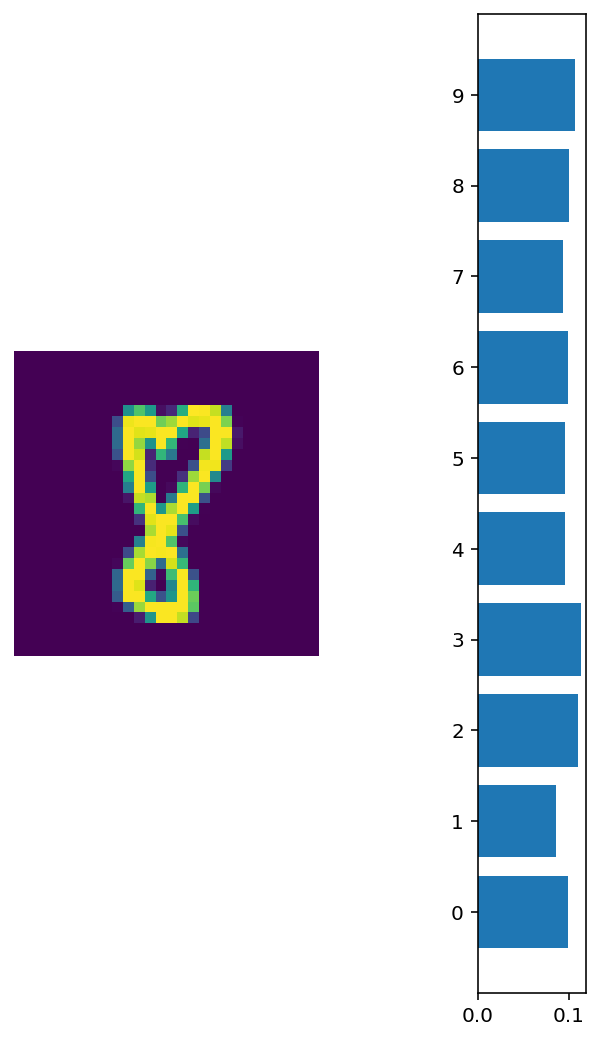

In [35]:
images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
utils.view_classify(images[0].view(1, 28, 28), ps)

## 3.- Entrenando a la red

Una parte importante del proceso del Deep Learning es el entrenamiento de las redes, ya que de ello depende
el rendimiento en las tareas que le encomendemos.

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) es un algoritmo para disminuir la función 
de pérdida o error a medida que nos adentramos en el entrenamiento. Durante el entrenamiento de cualquier
modelos de ML buscamos optimizar el error entre las predicciones y los datos reales.

Cuando la red tiene una sola capa, implementar *gradient descent* no es tan complicado, pero cuando añadimos más y más capas, demos recurrir a un método más sofisticado conocido como [Backprogation](https://en.wikipedia.org/wiki/Backpropagation).

**Autograd** 

[Autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) es un módulo de Pytorch para calcular el gradiente de los tensores. Permite un registro de las operaciones ejecutadas sobre ellos, le podemos indicar a Pytorch que lleve el control de los gradientes de varias maneras:
- Al momento de crear un tensor: `mi_tensor = torch.ones(10, requieres_grad=True)`
- In situ: `mi_tensor.requieres_grad_(True)`

### Preludio

Importaremos todo lo necesario

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict #dict subclass that remembers the order entries were added

import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import utils

In [37]:
x = torch.randn(2, 2, requires_grad=True)
print(x)

tensor([[ 0.0688,  0.4368],
        [-1.1881, -0.2148]], requires_grad=True)


In [38]:
y = x ** 2
print(y)

tensor([[0.0047, 0.1908],
        [1.4116, 0.0461]], grad_fn=<PowBackward0>)


En la celda de abajo podemos ver la función de derivación (gradiente) que Autograd creó para la operación de potenciación al cuadrado que especificamos anteriormente.

In [39]:
# Shows the function generated by this variable
print(y.grad_fn)

Calculemos la media de este tensor y, seguidamente, computemos su gradiente con el método `backward()`.

In [40]:
z = y.mean()
print(z)

tensor(0.4133, grad_fn=<MeanBackward0>)


In [41]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.0344,  0.2184],
        [-0.5941, -0.1074]])
tensor([[ 0.0344,  0.2184],
        [-0.5941, -0.1074]], grad_fn=<DivBackward0>)


/usr/local/lib/python3.8/dist-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Estos cálculos de gradiente son la clave para que las redes neuronales aprendan, dado que *backpropagation* requiere que el error se progague de las últimas hacia las primeras capas del modelo.

### Obteniendo los datos

Obtenemos el conjunto de los datos MNIST, los convertimos a tensores y normalizamos.

In [46]:
from torchvision import datasets, transforms


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5)),])
train_set = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

### Arquitectura 

Definimos la red neuronal, no activaremos las salidas de esta red. En cambio, produciremos *logits* puros
porque directamente los resultados de una función *softmax*, la cual genera una distribución de probabilidad
sobre las etiquetas, conduce a problemas de inestabilidad numérica ya que los valores están demasiado 
cerca de 1 o 0.

In [47]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
            ('fully_connected_1', nn.Linear(input_size, hidden_sizes[0])),
            ('relu_1', nn.ReLU()),
            ('fully_connected_2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
            ('relu_2', nn.ReLU()),
            ('logits', nn.Linear(hidden_sizes[1], output_size))
        ]))

### Entrenando la red

Para entrenar la red necesitamos la función de pérdida (comúnmente referida como el *criterio* o, en inglés, *criterion*).

**Función de perdida**

Usamos una función para optimizar los parámetros durante el entrenamiento. Hay muchas funciones
de pérdida disponibles en PyTorch, usaremos [CrossEntropy](https://en.wikipedia.org/wiki/Cross_entropy) recomendada en situaciones de *clasificación multiclase* y porque estamos implementando una salida *softmax*.

**Optimizador**

Es el objeto que recibe los parámetros del modelo y la tasa de aprendizaje, y se encarga de ajustar los parámetros en función del gradiente de la función de pérdida de forma iteractiva durante el entrenamiento de
la red. Utilizamos un algoritmo [SGD](https://pytorch.org/cppdocs/api/classtorch_1_1optim_1_1_s_g_d.html#exhale-class-classtorch-1-1optim-1-1-s-g-d).

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

Hacemos un entrenamiento en un solo paso, primero hacemos un paso con el `forward()` sobre el modelo.
Después, se calcula el error usando `criterion`. Para ello, le pasamos las etiquetas reales y las salidas de la red. Luego retroalimentamos con el error con `backward()`. Finalmente, actualizamos los parámetros llamando al método `step()` sobre el optimizador.

In [49]:
print(f'Initial weights - {model.fully_connected_1.weight}')

images, labels = next(iter(train_loader))
images.resize_(64, 784)

optimizer.zero_grad() # Reiniciamos los gradientes


output = model.forward(images) # Forward pass, then backward, then update
loss = criterion(output, labels)
loss.backward()
print(f'Gradient - {model.fully_connected_1.weight.grad}')
optimizer.step()

Initial weights - Parameter containing:
tensor([[-0.0058, -0.0051,  0.0229,  ...,  0.0093,  0.0203, -0.0047],
        [ 0.0128,  0.0347, -0.0356,  ...,  0.0043,  0.0109,  0.0051],
        [-0.0275, -0.0180, -0.0262,  ..., -0.0301,  0.0023, -0.0020],
        ...,
        [ 0.0129, -0.0192,  0.0110,  ...,  0.0269, -0.0177,  0.0075],
        [-0.0270,  0.0160, -0.0059,  ...,  0.0145, -0.0080, -0.0332],
        [-0.0204,  0.0097, -0.0262,  ...,  0.0194,  0.0320,  0.0037]],
       requires_grad=True)
Gradient - tensor([[ 0.0036,  0.0036,  0.0036,  ...,  0.0036,  0.0036,  0.0036],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0034, -0.0034, -0.0034,  ..., -0.0034, -0.0034, -0.0034],
        [-0.0027, -0.0027, -0.0027,  ..., -0.0027, -0.0027, -0.0027],
        [ 0.0047,  0.0047,  0.0047,  ...,  0.0047,  0.0047,  0.0047]])


In [50]:
print(f'Updated weights - {model.fully_connected_1.weight}')

Updated weights - Parameter containing:
tensor([[-0.0058, -0.0051,  0.0229,  ...,  0.0092,  0.0203, -0.0048],
        [ 0.0128,  0.0347, -0.0356,  ...,  0.0043,  0.0109,  0.0051],
        [-0.0275, -0.0180, -0.0262,  ..., -0.0301,  0.0023, -0.0020],
        ...,
        [ 0.0130, -0.0192,  0.0111,  ...,  0.0269, -0.0176,  0.0075],
        [-0.0270,  0.0161, -0.0059,  ...,  0.0145, -0.0079, -0.0331],
        [-0.0204,  0.0096, -0.0262,  ...,  0.0193,  0.0319,  0.0036]],
       requires_grad=True)


Para entrenar en serio, sólo debemos repetir el paso anterior para cada lote de datos, durante cada epoch

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [51]:
epochs = 3
print_every = 40
steps = 0

for epoch in range(epochs):
    running_loss = 0
    for images, labels in iter(train_loader):
        steps += 1
        
        images.resize_(images.size()[0], 784)  # Flatten
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print(f'Epoch: {epoch + 1}/{epochs}...\nLoss: {running_loss/print_every}')
            
            running_loss = 0


Epoch: 1/3...
Loss: 2.2834443271160128
Epoch: 1/3...
Loss: 2.225394457578659
Epoch: 1/3...
Loss: 2.150667780637741
Epoch: 1/3...
Loss: 2.0390497356653214
Epoch: 1/3...
Loss: 1.9129345685243606
Epoch: 1/3...
Loss: 1.7164293825626373
Epoch: 1/3...
Loss: 1.5164260625839234
Epoch: 1/3...
Loss: 1.3043747007846833
Epoch: 1/3...
Loss: 1.1511045470833778
Epoch: 1/3...
Loss: 1.0209702372550964
Epoch: 1/3...
Loss: 0.8884256690740585
Epoch: 1/3...
Loss: 0.782382944226265
Epoch: 1/3...
Loss: 0.7243492290377617
Epoch: 1/3...
Loss: 0.6607664085924625
Epoch: 1/3...
Loss: 0.6245679259300232
Epoch: 1/3...
Loss: 0.6010268323123455
Epoch: 1/3...
Loss: 0.5787739753723145
Epoch: 1/3...
Loss: 0.5708183087408543
Epoch: 1/3...
Loss: 0.5236851625144482
Epoch: 1/3...
Loss: 0.5417415596544742
Epoch: 1/3...
Loss: 0.49265484809875487
Epoch: 1/3...
Loss: 0.4812755659222603
Epoch: 1/3...
Loss: 0.4554586801677942
Epoch: 2/3...
Loss: 0.2711263902485371
Epoch: 2/3...
Loss: 0.42558762319386007
Epoch: 2/3...
Loss: 0.4510

**Resultados**

Vemos la dinámica de la función de pérdida y las interacciones.

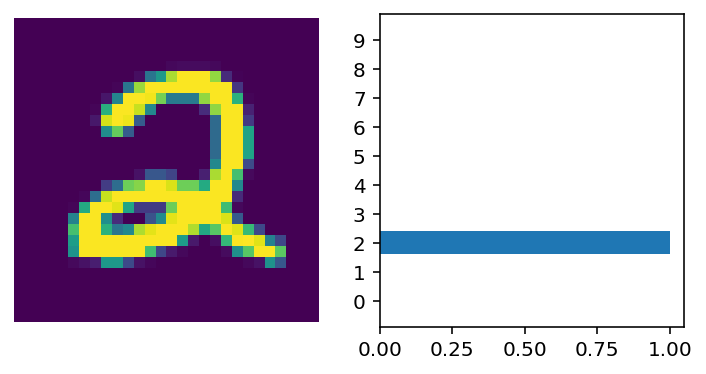

In [57]:
images, labels = next(iter(train_loader))

image = images[2].view(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(image)
    
predictions = F.softmax(logits, dim=1)
utils.view_classify(image.view(1, 28, 28), predictions)

Se puede observar la disminución del error de clasificación a medida que se ha ido entrenando la RNA.

## 4.- Un problema más difícil: Fashion-MNIST

MNIST ha estado rondando por ahí durante bastante tiempo y ha llegado al punto en el que resolver el problema que presenta se ha vuelvo trivial y, por tanto, no provee un buen punto de referencia para muchos algoritmos modernos de Machine y Deep Learning.

Fashion-MNIST, por su parte, pretende reemplazar al MNIST tradicional como el dataset por defecto para medir la efectividad de los modelos de Deep Learning. Es más complejo puesto que sus imágenes representan diversas prendas de ropa, en vez de dígitos escritos a mano.

Como sucede con el MNIST original, cada imagen tiene una resolución de 28x28 y se encuentra en escala de grises.

### Preludio

Igual que para el MNIST tradicional cargamos librerias

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import torch
from torchvision import datasets, transforms
import utils

import matplotlib.pyplot as plt
import numpy as np
import time

from torch import nn
from torch import optim
import torch.nn.functional as F

### Datos

Esto deberia ser familiar

In [59]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5)),])

train_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

100.0%

Extracting Fashion_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Fashion_MNIST_data/FashionMNIST/raw


111.0%

Extracting Fashion_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Fashion_MNIST_data/FashionMNIST/raw


100.0%

Extracting Fashion_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Fashion_MNIST_data/FashionMNIST/raw


159.1%

Extracting Fashion_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Fashion_MNIST_data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Un vistazo a los datos

Demos un vistazo a una imagen de prueba

<AxesSubplot:>

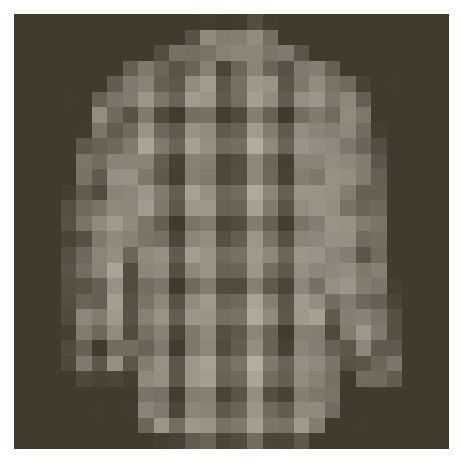

In [63]:
image, label = next(iter(train_loader)) #Pulsar varias veces
utils.show_image(image[0, :])

### La red

Definimos una red usando `OrdereDict`, nombramos cada capa/operación

In [64]:
input_size = 784
hidden_sizes = [512, 256, 128]
output_size = 10

model = nn.Sequential(OrderedDict([
            ('fully_connected_1', nn.Linear(input_size, hidden_sizes[0])),
            ('relu_1', nn.ReLU()),
            ('fully_connected_2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
            ('relu_2', nn.ReLU()),
            ('fully_connected_3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
            ('relu_3', nn.ReLU()),
            ('logits', nn.Linear(hidden_sizes[2], output_size)),
        ]))
model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=512, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=512, out_features=256, bias=True)
  (relu_2): ReLU()
  (fully_connected_3): Linear(in_features=256, out_features=128, bias=True)
  (relu_3): ReLU()
  (logits): Linear(in_features=128, out_features=10, bias=True)
)

### ¡Hora de Entrenar!

Entrenar es bastante sencillo, como ya has visto:

 - Paso 1: Define el criterio (función de pérdida).
 - Paso 2: Define el optimizador (por ejemplo, [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).
 - Paso 3: Para cada lote en cada epoch:
     - Calcula las salidas de la red.
     - Calcula la pérdida o error.
     - Propaga el error hacia atrás.
     - Actualiza los parámetros.

In [65]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [66]:
epochs = 10
print_every = 50
steps = 0

for epoch in range(1, epochs + 1):
    running_loss = 0
    for images, labels in iter(train_loader):
        steps += 1
        
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print(f'Epoch: {epoch}/{epochs}...\nLoss: {running_loss/print_every}')
            
            running_loss = 0

Epoch: 1/10...
Loss: 1.0777680850028992
Epoch: 1/10...
Loss: 0.6614168781042099
Epoch: 1/10...
Loss: 0.5635613352060318
Epoch: 1/10...
Loss: 0.5310867822170258
Epoch: 1/10...
Loss: 0.48669349908828735
Epoch: 1/10...
Loss: 0.5101303610205651
Epoch: 1/10...
Loss: 0.47610639452934267
Epoch: 1/10...
Loss: 0.46217997789382936
Epoch: 1/10...
Loss: 0.4870587205886841
Epoch: 1/10...
Loss: 0.42454107105731964
Epoch: 1/10...
Loss: 0.4491165527701378
Epoch: 1/10...
Loss: 0.4079718515276909
Epoch: 1/10...
Loss: 0.4197344359755516
Epoch: 1/10...
Loss: 0.4228763198852539
Epoch: 1/10...
Loss: 0.4226401975750923
Epoch: 1/10...
Loss: 0.4228140923380852
Epoch: 1/10...
Loss: 0.4182841131091118
Epoch: 1/10...
Loss: 0.4573587027192116
Epoch: 2/10...
Loss: 0.09166890501976013
Epoch: 2/10...
Loss: 0.36332558155059813
Epoch: 2/10...
Loss: 0.3750085240602493
Epoch: 2/10...
Loss: 0.4183532527089119
Epoch: 2/10...
Loss: 0.38412598222494126
Epoch: 2/10...
Loss: 0.38415744811296465
Epoch: 2/10...
Loss: 0.369301045

### Resultados

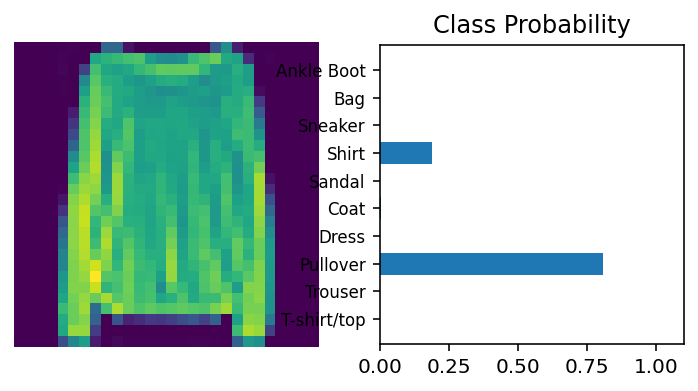

In [70]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

image = images[0]

image = image.resize_(1, 784)

with torch.no_grad():
    logits = model.forward(image)
    
predictions = F.softmax(logits, dim=1)
utils.view_classify(image.view(1, 28, 28), predictions, version='Fashion')